In [41]:
import matplotlib as plt
import numpy as np
import pandas as pd
from mplsoccer import Pitch, Sbopen, VerticalPitch
from statsbombpy import sb
parser = Sbopen()

In [ ]:
#lets first get data on Girogio only and groupby his games, (total shots, shotas at target, goals,saves)
df_euros = parser.competition()


df_euros.info()

In [26]:
get_euros = df_euros['competition_name'].unique()
df_euros = df_euros[df_euros['competition_name'] == 'UEFA Euro']
df_euros.reset_index(drop=True)
df_euros

competition_id  season_id country_name competition_name  \
68              55        282       Europe        UEFA Euro   
69              55         43       Europe        UEFA Euro   

   competition_gender  competition_youth  competition_international  \
68               male              False                       True   
69               male              False                       True   

   season_name               match_updated           match_updated_360  \
68        2024  2024-07-15T15:48:50.315500  2024-07-15T15:52:24.778809   
69        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   

           match_available_360             match_available  
68  2024-07-15T15:52:24.778809  2024-07-15T15:48:50.315500  
69  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402

In [105]:
#Match Data
df_euros_matches = parser.match(competition_id=55, season_id=282)

In [112]:
#Lets get formation data
#unique game_id
import json
list_game_id = df_euros_matches['match_id'].unique()
#df_euros_lineup = []
all_data = []
#Append all lineups to the df
for i in list_game_id:
    temp = sb.lineups(match_id=i)
    for nation, data in temp.items():
        df_iter = pd.DataFrame(data)
        df_iter['country'] = nation
        df_iter['match_id'] = i
        all_data.append(df_iter)
    df_euros_lineup = pd.concat(all_data, ignore_index=True)

#These should match
#print(len(list_game_id) == len(df_euros_lineup['match_id'].unique())) #True


In [113]:
df_euros_lineup[df_euros_lineup['player_id'] == 37274 ]

player_id      player_name player_nickname  jersey_number      country  \
23        37274  Bart Verbruggen            None              1  Netherlands   
173       37274  Bart Verbruggen            None              1  Netherlands   
271       37274  Bart Verbruggen            None              1  Netherlands   
621       37274  Bart Verbruggen            None              1  Netherlands   
1148      37274  Bart Verbruggen            None              1  Netherlands   
1481      37274  Bart Verbruggen            None              1  Netherlands   

     cards                                          positions  match_id  
23      []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3942819  
173     []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3942382  
271     []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3930180  
621     []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3941021  
1148    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3930173  
1481    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3938637

In [129]:
df_goalkeepers = df_euros_lineup[df_euros_lineup['positions'].apply(lambda x: any(d.get('position') == 'Goalkeeper' for d in x))]
count_gk = df_goalkeepers['player_id'].value_counts()
min_three_games = count_gk[count_gk >=3].index
df_goalkeepers = df_goalkeepers[df_goalkeepers['player_id'].isin(min_three_games)]
#df_goalkeepers = df_goalkeepers.drop_duplicates(subset=['player_id', 'player_name'])
df_goalkeepers['Total Matches'] = df_goalkeepers['player_id'].map(count_gk)
unique = df_goalkeepers['player_name'].drop_duplicates()
df_goalkeepers[df_goalkeepers['player_name'] == 'Giorgi Mamardashvili']


player_id           player_name player_nickname  jersey_number  country  \
792      102371  Giorgi Mamardashvili            None             25  Georgia   
1606     102371  Giorgi Mamardashvili            None             25  Georgia   
1656     102371  Giorgi Mamardashvili            None             25  Georgia   
1759     102371  Giorgi Mamardashvili            None             25  Georgia   

     cards                                          positions  match_id  \
792     []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3941018   
1606    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3938642   
1656    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3938639   
1759    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   3938644   

      Total Matches  
792               4  
1606              4  
1656              4  
1759              4

In [256]:
#Get match events of Giorgi

match_id_giorgi = df_goalkeepers.loc[df_goalkeepers['player_name'] == 'Giorgi Mamardashvili', 'match_id'].tolist()

print(match_id_giorgi)
df_all_giorgi = []
for i in match_id_giorgi:
    df, related, freeze, tactics = parser.event(i)
    df_actions_againt = df[df['team_name'] != 'Georgia']
    df_actions_againt = df.loc[df['type_name'] == 'Shot'].set_index('id')
    df_actions_againt['match_id'] = i
    df_all_giorgi.append(df_actions_againt)
df_all_giorgi = pd.concat(df_all_giorgi, ignore_index=True)

df_all_giorgi.columns()


[3941018, 3938642, 3938639, 3938644]


Index(['index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'pass_cross', 'outcome_id',
       'outcome_name', 'ball_recovery_recovery_failure', 'under_pressure',
       'counterpress', 'pass_switch', 'shot_statsbomb_xg', 'technique_id',
       'technique_name', 'goalkeeper_position_id', 'goalkeeper_position_name',
       'out', 'foul_committed_advantage', 'foul_won_advantage',
       'pass_assisted_shot_id', 'pass_shot_assist', 'end_z',
       'shot_key_pass_id', 'shot_first_time', 'off_c

In [257]:
columns_to_keep = ['match_id','x', 'y', 'outcome_name', 'shot_statsbomb_xg', 'team_name', 'player_name']
filtered_giorgi = df_all_giorgi[columns_to_keep]
filtered_giorgi['outcome_name'].unique()

array(['Blocked', 'Saved', 'Off T', 'Goal', 'Wayward', 'Post'],
      dtype=object)

In [258]:
#lets only get shots that were saved, post, goal, save xg of goals saved
data_to_keep = ['Saved','Goal']
filtered_shots_giorgi = filtered_giorgi[filtered_giorgi['outcome_name'].isin(data_to_keep)]
filtered_shots_giorgi['outcome_name'].unique()

array(['Saved', 'Goal'], dtype=object)

In [323]:
#df_euros_matches[df_euros_matches['match_id'] == 3941018].columns
filtered_shots_giorgi = filtered_giorgi
filtered_shots_giorgi = filtered_shots_giorgi[filtered_shots_giorgi['team_name'] != "Georgia"]
filtered_shots_giorgi[filtered_shots_giorgi['outcome_name'] == 'Saved']

match_id      x     y outcome_name  shot_statsbomb_xg       team_name  \
1     3941018  109.5  47.0        Saved           0.208816           Spain   
3     3941018  113.4  30.1        Saved           0.047664           Spain   
8     3941018  103.7  54.8        Saved           0.030612           Spain   
14    3941018   96.3  28.4        Saved           0.015616           Spain   
15    3941018  113.4  27.4        Saved           0.042120           Spain   
21    3941018   99.6  43.0        Saved           0.083603           Spain   
31    3941018  108.3  38.6        Saved           0.266806           Spain   
32    3941018  114.8  47.3        Saved           0.285973           Spain   
36    3941018   99.5  41.3        Saved           0.053031           Spain   
39    3938642  110.7  30.3        Saved           0.117866  Czech Republic   
41    3938642  112.8  46.4        Saved           0.155035  Czech Republic   
42    3938642  105.6  41.2        Saved           0.025927  Czech Republic   
48    3938642  113.9  35.8        Saved           0.291242  Czech Republic   
49    3938642  113.6  43.0        Saved           0.531468  Czech Republic   
50    3938642  101.1  27.1        Saved           0.047879  Czech Republic   
53    3938642  104.6  39.9        Saved           0.117003  Czech Republic   
61    3938642   95.4  44.6        Saved           0.035876  Czech Republic   
66    3938642  100.9  45.2        Saved           0.066843  Czech Republic   
68    3938642  101.0  23.0        Saved           0.029686  Czech Republic   
77    3938639  111.6  20.7        Saved           0.010085          Turkey   
88    3938639  111.7  46.2        Saved           0.391949          Turkey   
92    3938639   93.2  31.5        Saved           0.048410          Turkey   
102   3938639  111.8  37.6        Saved           0.158870          Turkey   
109   3938644   87.1  41.7        Saved           0.022707        Portugal   
113   3938644   92.0  26.5        Saved           0.019304        Portugal   
120   3938644   96.9  45.9        Saved           0.042603        Portugal   
131   3938644  115.8  45.8        Saved           0.214248        Portugal   
134   3938644   93.5  52.2        Saved           0.023085        Portugal   

                                  player_name  
1                        Pedro González López  
3                       Daniel Carvajal Ramos  
8                            Fabián Ruiz Peña  
14                      Marc Cucurella Saseta  
15                  Nicholas Williams Arthuer  
21                Lamine Yamal Nasraoui Ebana  
31                       Daniel Olmo Carvajal  
32                Lamine Yamal Nasraoui Ebana  
36                       Daniel Olmo Carvajal  
39                                Adam Hložek  
41                              Patrik Schick  
42                              Patrik Schick  
48                                Adam Hložek  
49                               Václav Černý  
50                                Adam Hložek  
53                              Patrik Schick  
61                              Matěj Jurásek  
66                               Ondřej Lingr  
68                              Matěj Jurásek  
77                               Kenan Yildiz  
88                                Mert Müldür  
92                           Hakan Çalhanoğlu  
102                              Yusuf Yazıcı  
109       Cristiano Ronaldo dos Santos Aveiro  
113  João Maria Lobo Alves Palhinha Gonçalves  
120                       João Félix Sequeira  
131                      Nélson Cabral Semedo  
134                 José Diogo Dalot Teixeira

Text(0.5, 0.98, 'Mamardashvili (xg Saved:1.034241939) vs Spain 4 (xg:2.7647263759999996 )')

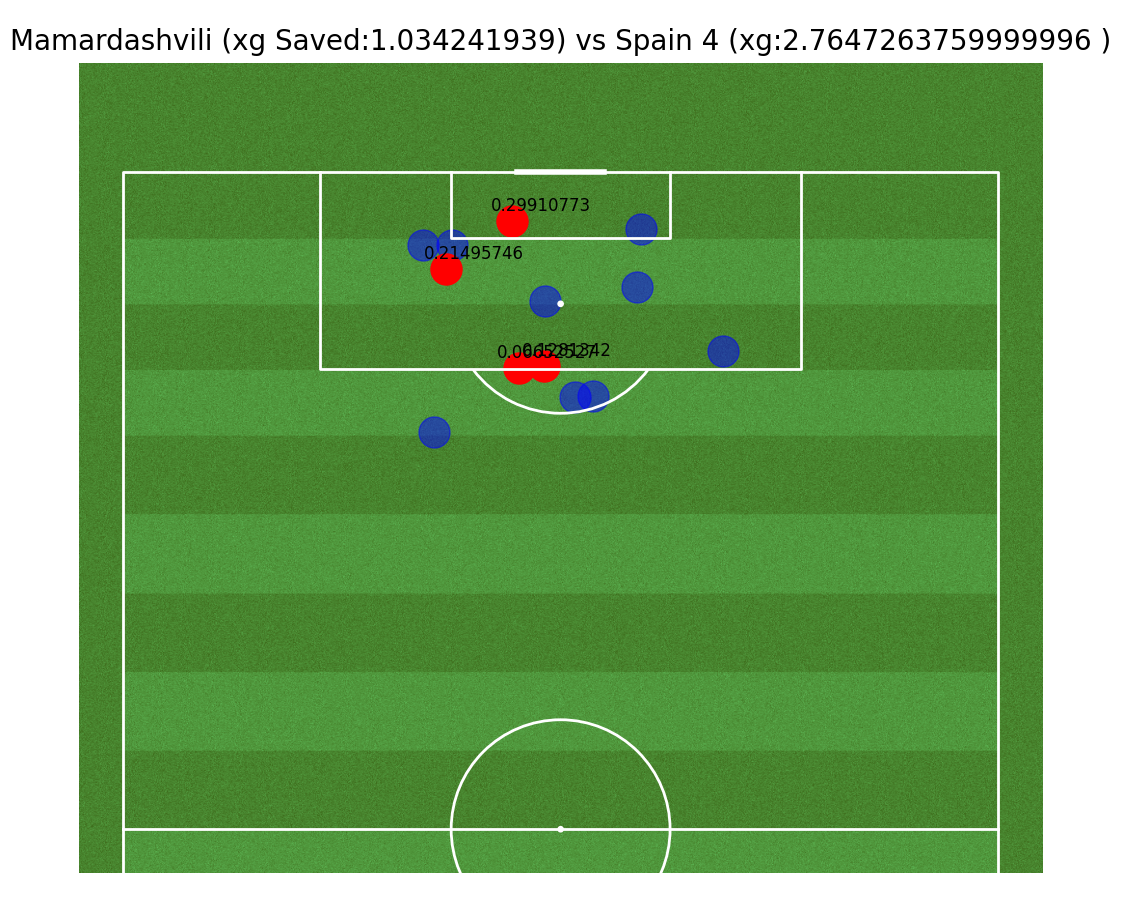

In [260]:
pitch = VerticalPitch(pitch_color='grass', line_color='white', pad_top=10, line_zorder=2,
              stripe=True, half=True) 
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

home_team = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[0]]['home_team_name'].iloc[0]
away_team = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[0]]['away_team_name'].iloc[0]
home_team_score = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[0]]['home_score'].iloc[0]
away_team_score = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[0]]['away_score'].iloc[0]
total_xg_saved = 0
total_xg_game = 0

for i, row in filtered_shots_giorgi.iterrows():
    if row['match_id'] == match_id_giorgi[0]:
        total_xg_game += row['shot_statsbomb_xg']
        if row['outcome_name'] == 'Goal':
            pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
            pitch.annotate(row["shot_statsbomb_xg"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
        if row['outcome_name'] == 'Saved':
            pitch.scatter(row.x, row.y, alpha = 0.5, s = 500, color = "blue", ax=ax['pitch'])
            total_xg_saved += row['shot_statsbomb_xg']

fig.suptitle(f'Mamardashvili (xg Saved:{total_xg_saved}) vs {home_team} {home_team_score} (xg:{total_xg_game} )', fontsize = 20)





0.022706533
Cristiano Ronaldo dos Santos Aveiro
0.019303527
João Maria Lobo Alves Palhinha Gonçalves
0.04260302
João Félix Sequeira
0.21424782
Nélson Cabral Semedo
0.023084719
José Diogo Dalot Teixeira


Text(0.5, 0.98, 'Mamardashvili (xg Saved:0.32194561899999996) vs Portugal 0 (xg:2.3561307869999997 )')

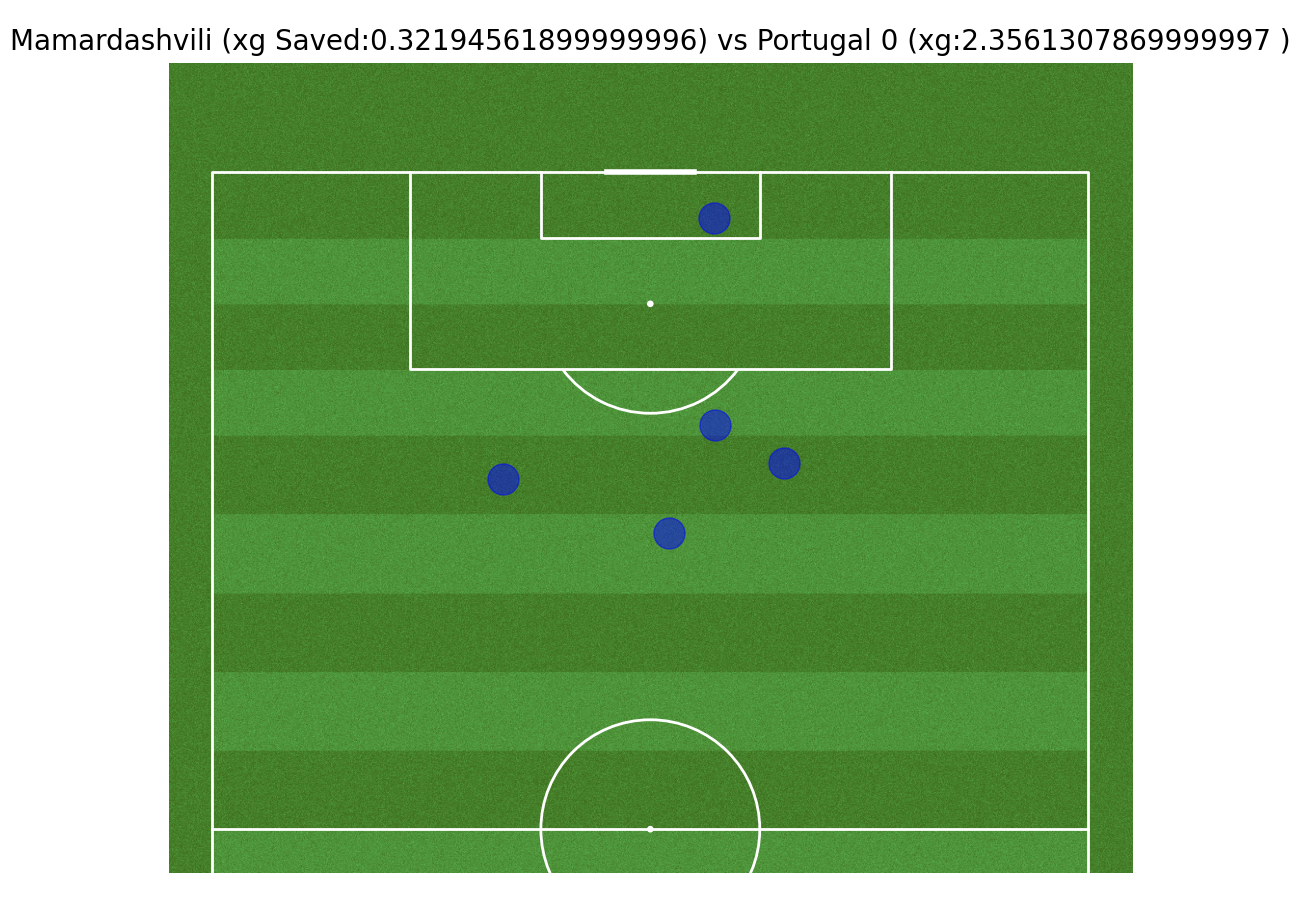

In [261]:
pitch = VerticalPitch(pitch_color='grass', line_color='white', pad_top=10, line_zorder=2,
              stripe=True, half=True) 
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

home_team = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[3]]['home_team_name'].iloc[0]
away_team = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[3]]['away_team_name'].iloc[0]
home_team_score = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[3]]['home_score'].iloc[0]
away_team_score = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[3]]['away_score'].iloc[0]
total_xg_saved = 0
total_xg_game = 0

for i, row in filtered_shots_giorgi.iterrows():
    if row['match_id'] == match_id_giorgi[3]:
        total_xg_game += row['shot_statsbomb_xg']
        if row['outcome_name'] == 'Goal':
            pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
            pitch.annotate(row["shot_statsbomb_xg"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
        if row['outcome_name'] == 'Saved':
            pitch.scatter(row.x, row.y, alpha = 0.5, s = 500, color = "blue", ax=ax['pitch'])
            total_xg_saved += row['shot_statsbomb_xg']
            print(row['shot_statsbomb_xg'])
            print(row['player_name'])

fig.suptitle(f'Mamardashvili (xg Saved:{total_xg_saved}) vs {away_team} {away_team_score} (xg:{total_xg_game} )', fontsize = 20)





Text(0.5, 0.98, 'Mamardashvili (xg Saved:1.418825372) vs Czech Republic 1 (xg:2.8654523907000007 )')

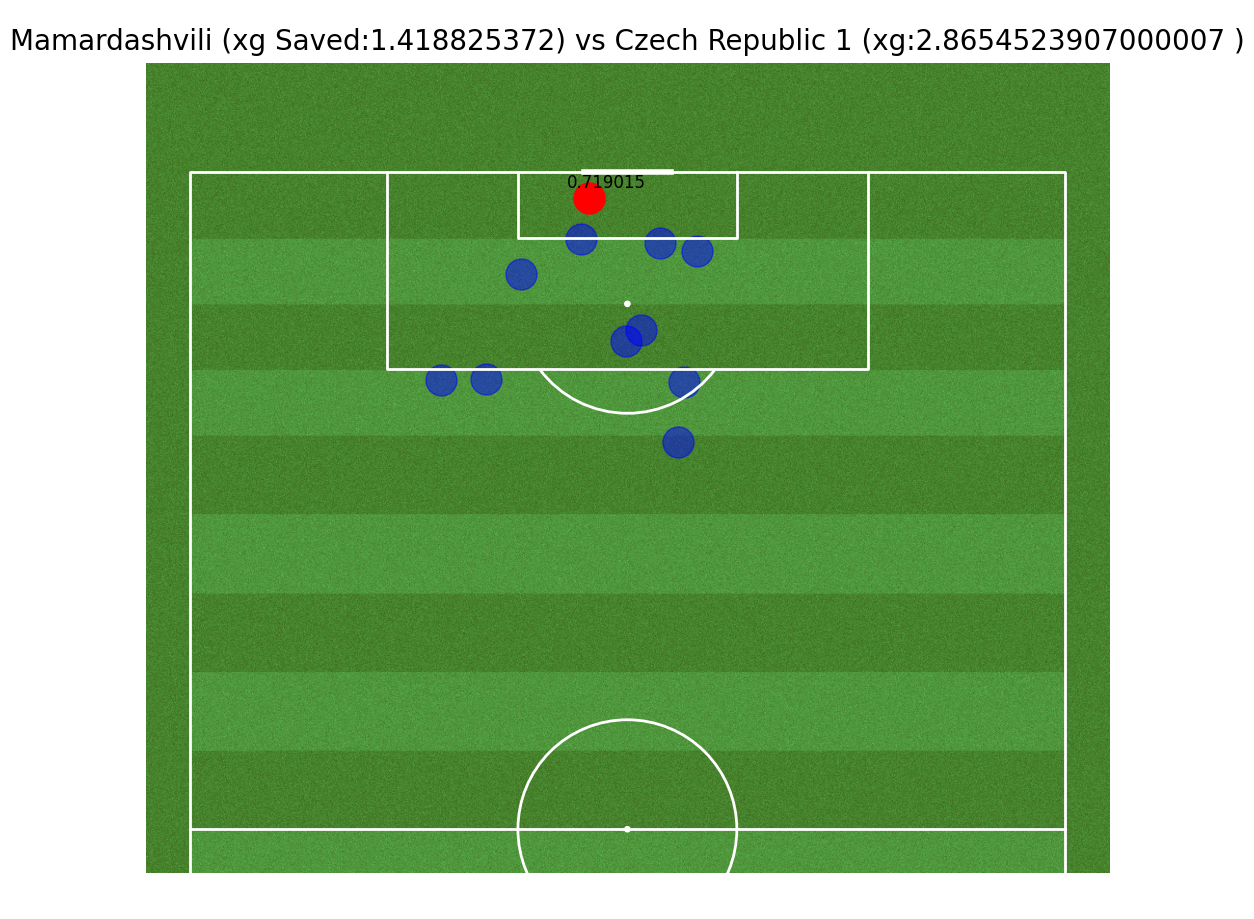

In [250]:
pitch = VerticalPitch(pitch_color='grass', line_color='white', pad_top=10, line_zorder=2,
              stripe=True, half=True) 
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

home_team = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[1]]['home_team_name'].iloc[0]
away_team = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[1]]['away_team_name'].iloc[0]
home_team_score = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[1]]['home_score'].iloc[0]
away_team_score = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[1]]['away_score'].iloc[0]
total_xg_saved = 0
total_xg_game = 0

for i, row in filtered_shots_giorgi.iterrows():
    if row['match_id'] == match_id_giorgi[1]:
        total_xg_game += row['shot_statsbomb_xg']
        if row['outcome_name'] == 'Goal':
            pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
            pitch.annotate(row["shot_statsbomb_xg"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
        if row['outcome_name'] == 'Saved':
            pitch.scatter(row.x, row.y, alpha = 0.5, s = 500, color = "blue", ax=ax['pitch'])
            total_xg_saved += row['shot_statsbomb_xg']

fig.suptitle(f'Mamardashvili (xg Saved:{total_xg_saved}) vs {away_team} {away_team_score} (xg:{total_xg_game} )', fontsize = 20)





Text(0.5, 0.98, 'Mamardashvili (xg Saved:0.609314047) vs Turkey 3 (xg:2.4031512066999996 )')

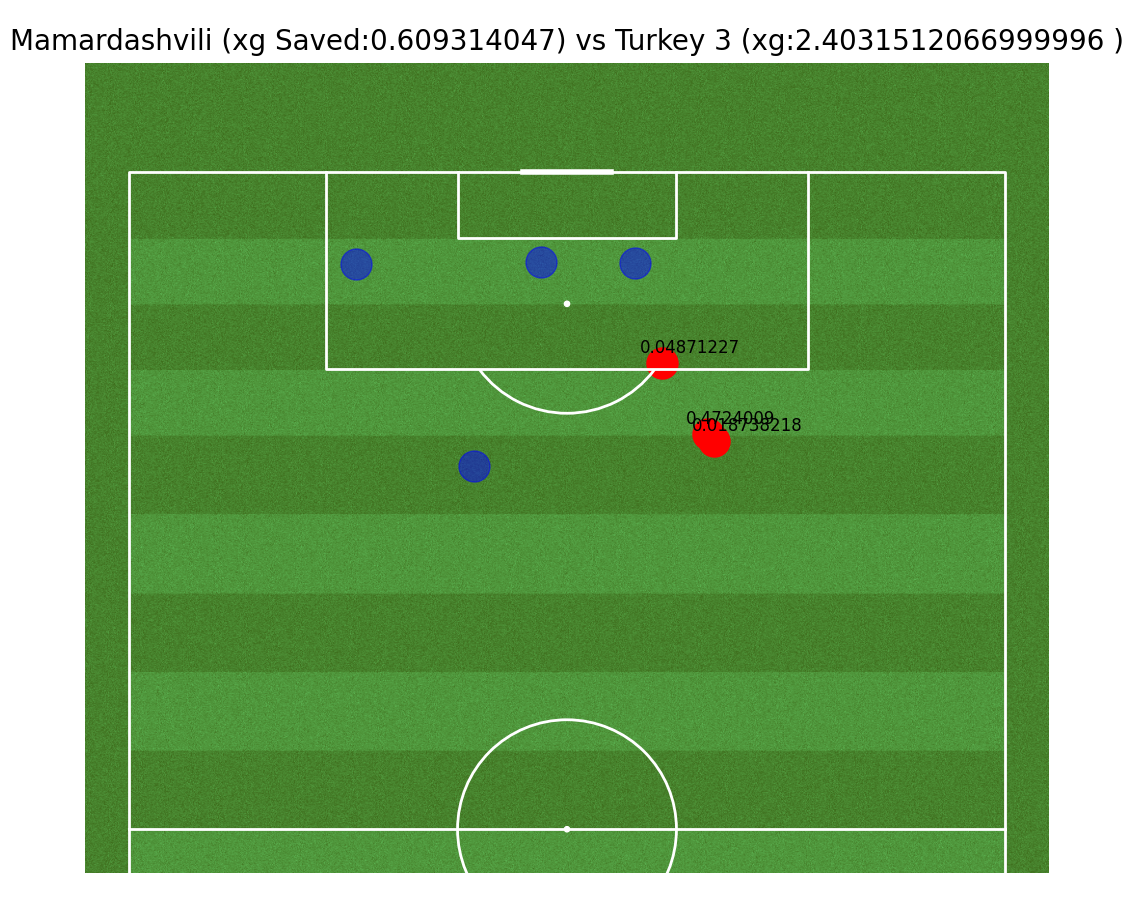

In [251]:
pitch = VerticalPitch(pitch_color='grass', line_color='white', pad_top=10, line_zorder=2,
              stripe=True, half=True) 
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

home_team = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[2]]['home_team_name'].iloc[0]
away_team = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[2]]['away_team_name'].iloc[0]
home_team_score = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[2]]['home_score'].iloc[0]
away_team_score = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[2]]['away_score'].iloc[0]
total_xg_saved = 0
total_xg_game = 0
for i, row in filtered_shots_giorgi.iterrows():
    if row['match_id'] == match_id_giorgi[2]:
        total_xg_game += row['shot_statsbomb_xg']
        if row['outcome_name'] == 'Goal':
            pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
            pitch.annotate(row["shot_statsbomb_xg"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
        if row['outcome_name'] == 'Saved':
            pitch.scatter(row.x, row.y, alpha = 0.5, s = 500, color = "blue", ax=ax['pitch'])
            total_xg_saved += row['shot_statsbomb_xg']

fig.suptitle(f'Mamardashvili (xg Saved:{total_xg_saved}) vs {home_team} {home_team_score} (xg:{total_xg_game} )', fontsize = 20)





In [202]:
"""#Draw all pitches for all the games of giorgi
from highlight_text import ax_text
pitch = VerticalPitch(pitch_color='grass', line_color='white', pad_top=10, line_zorder=2,
              stripe=True, half=True) 
fig, axs = pitch.grid(nrows=2, ncols=2, figheight=30,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=True,
                      title_height=0.08, grid_height=0.84)

for idx, ax in enumerate(axs['pitch'].flat):
    #go through each match id and fig
    home_team = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[idx]]['home_team_name'].iloc[0]
    away_team = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[idx]]['away_team_name'].iloc[0]
    home_team_score = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[idx]]['home_score'].iloc[0]
    away_team_score = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[idx]]['away_score'].iloc[0]
    print(home_team)
    if home_team == 'Georgia':
        ax_text(-5, 0, f'Mamardashvili vs {away_team} {away_team_score} (xg: (only at target: )', ha='center', va='center', fontsize=50, ax=ax)
    else:
        ax_text(-5, 0, f'Mamardashvili vs {home_team} {home_team_score} (xg: (only at target: )', ha='center', va='center', fontsize=50, ax=ax)



#axs['title'].text(0.5, 0.5, 'Giorgi Mamardashvili shots saved(Blue) vs Conceeded(Red)', ha='center', va='center', fontsize=30)
"""

"#Draw all pitches for all the games of giorgi\nfrom highlight_text import ax_text\npitch = VerticalPitch(pitch_color='grass', line_color='white', pad_top=10, line_zorder=2,\n              stripe=True, half=True) \nfig, axs = pitch.grid(nrows=2, ncols=2, figheight=30,\n                      endnote_height=0.03, endnote_space=0,\n                      # Turn off the endnote/title axis. I usually do this after\n                      # I am happy with the chart layout and text placement\n                      axis=True,\n                      title_height=0.08, grid_height=0.84)\n\nfor idx, ax in enumerate(axs['pitch'].flat):\n    #go through each match id and fig\n    home_team = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[idx]]['home_team_name'].iloc[0]\n    away_team = df_euros_matches[df_euros_matches['match_id'] ==  match_id_giorgi[idx]]['away_team_name'].iloc[0]\n    home_team_score = df_euros_matches[df_euros_matches['match_id'] == match_id_giorgi[idx]]['home_s

In [265]:
df_goalkeepers

player_id          player_name player_nickname  jersey_number  \
23        37274      Bart Verbruggen            None              1   
31         3468      Jordan Pickford            None              1   
65        11748  Unai Simón Mendibil      Unai Simón             23   
81         3468      Jordan Pickford            None              1   
107        3761         Mike Maignan            None             16   
...         ...                  ...             ...            ...   
2472      16531    Dominik Livaković            None              1   
2489       8524        Péter Gulácsi            None              1   
2517       5550          Yann Sommer            None              1   
2540       5570         Manuel Neuer            None              1   
2583      22379           Angus Gunn            None              1   

          country cards                                          positions  \
23    Netherlands    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
31        England    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
65          Spain    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
81        England    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
107        France    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
...           ...   ...                                                ...   
2472      Croatia    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
2489      Hungary    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
2517  Switzerland    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
2540      Germany    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   
2583     Scotland    []  [{'position_id': 1, 'position': 'Goalkeeper', ...   

      match_id  Total Matches  
23     3942819              6  
31     3942819              7  
65     3943043              6  
81     3943043              7  
107    3942752              6  
...        ...            ...  
2472   3930160              3  
2489   3930159              3  
2517   3930159              5  
2540   3930158              5  
2583   3930158              3  

[94 rows x 9 columns]

In [275]:
#lets gather as a table all the keeprs stats saved total shots at them and then percentage and normalize per game
df_goalkeepers
df_all_gk_event = []
for player_name in df_goalkeepers['player_name'].unique():
    print(player_name)
    player_match_id_list = df_goalkeepers.loc[df_goalkeepers['player_name'] == player_name, 'match_id'].tolist()
    curr_nation = df_goalkeepers.loc[df_goalkeepers['player_name'] == player_name, 'country'].unique()[0]
    print(curr_nation)
    for i in player_match_id_list:
        df, related, freeze, tactics = parser.event(i)
        df_actions_againt = df[df['team_name'] != curr_nation]
        df_actions_againt = df_actions_againt.loc[df_actions_againt['type_name'] == 'Shot'].set_index('id')
        df_actions_againt['match_id'] = i
        df_actions_againt['gk'] = player_name
        df_all_gk_event.append(df_actions_againt)
df_all_gk_event = pd.concat(df_all_gk_event, ignore_index=True)
columns_to_keep = ['gk', 'match_id','x', 'y', 'outcome_name', 'shot_statsbomb_xg', 'team_name']
filtered_gk = df_all_gk_event[columns_to_keep]
data_to_keep = ['Saved','Goal']
filtered_gk = filtered_gk[filtered_gk['outcome_name'].isin(data_to_keep)]
filtered_gk['outcome_name'].unique()
filtered_gk

Bart Verbruggen
Netherlands
Jordan Pickford
England
Unai Simón Mendibil
Spain
Mike Maignan
France
Fehmi Mert Günok
Turkey
Diogo Meireles Costa
Portugal
Patrick Pentz
Austria
Kasper Schmeichel
Denmark
Yann Sommer
Switzerland
Manuel Neuer
Germany
Koen Casteels
Belgium
Jindřich Staněk
Czech Republic
Florin Constantin Niţă
Romania
Jan Oblak
Slovenia
Giorgi Mamardashvili
Georgia
Martin Dúbravka
Slovakia
Predrag Rajković
Serbia
Thomas Strakosha
Albania
Gianluigi Donnarumma
Italy
Péter Gulácsi
Hungary
Angus Gunn
Scotland
Dominik Livaković
Croatia


gk  match_id      x     y outcome_name  \
0       Bart Verbruggen   3942819   88.2  36.6        Saved   
2       Bart Verbruggen   3942819  108.1  40.0         Goal   
3       Bart Verbruggen   3942819  117.0  47.6        Saved   
5       Bart Verbruggen   3942819   98.4  50.6        Saved   
8       Bart Verbruggen   3942819  110.4  53.5         Goal   
...                 ...       ...    ...   ...          ...   
1216  Dominik Livaković   3930160   98.8  47.5        Saved   
1218  Dominik Livaković   3930160  104.1  39.9         Goal   
1219  Dominik Livaković   3930160  103.9  38.7         Goal   
1221  Dominik Livaković   3930160  112.7  42.4         Goal   
1222  Dominik Livaković   3930160  108.6  48.3        Saved   

      shot_statsbomb_xg team_name  
0              0.028932   England  
2              0.783500   England  
3              0.188995   England  
5              0.034638   England  
8              0.035494   England  
...                 ...       ...  
1216           0.053676     Spain  
1218           0.425340     Spain  
1219           0.056130     Spain  
1221           0.301003     Spain  
1222           0.281681     Spain  

[400 rows x 7 columns]

In [313]:
df = filtered_gk

In [305]:
# Calculate xG totals separately for saves and overall
saved_xg = df[df['outcome_name'] == 'Saved'].groupby('gk')['shot_statsbomb_xg'].sum().reset_index()
saved_xg = saved_xg.rename(columns={'shot_statsbomb_xg': 'xg_total_saved'})

# Calculate total goals and saves, and overall xG
summary = df.groupby('gk').agg(
    total_goals=('outcome_name', lambda x: (x == 'Goal').sum()),
    total_saves=('outcome_name', lambda x: (x == 'Saved').sum()),
    xg_total_all=('shot_statsbomb_xg', 'sum'),
    games_played=('match_id', 'nunique')  # Count unique matches
).reset_index()

# Merge the saved xG with the summary DataFrame
summary = summary.merge(saved_xg, on='gk', how='left').fillna(0)

# Format xG totals to 7 decimal places
summary['xg_total_saved'] = summary['xg_total_saved'].round(7)
summary['xg_total_all'] = summary['xg_total_all'].round(7)

# Calculate save percentage
summary['save_percentage'] = summary['total_saves'] / (summary['total_goals'] + summary['total_saves'])
summary['save_percentage'] = (summary['save_percentage'] * 100).round(1)  # Convert to percentage

# Calculate average xG saves
average_xg_saves = summary['xg_total_saved'].mean()

# Calculate performance compared to average
summary['performance_vs_average'] = summary['xg_total_saved'] - average_xg_saves

# Sort by performance from best to worst
sorted_summary = summary.sort_values(by='performance_vs_average', ascending=False)

# Keep relevant columns
final_output = sorted_summary[['gk', 'total_goals', 'total_saves', 'games_played', 
                                'xg_total_saved', 'xg_total_all', 
                                'save_percentage', 'performance_vs_average']]

In [324]:
final_output

gk  total_goals  total_saves  games_played  \
7     Giorgi Mamardashvili            8           28             4   
2     Diogo Meireles Costa            8           14             5   
20     Unai Simón Mendibil            3           14             5   
15            Mike Maignan            6           15             6   
6     Gianluigi Donnarumma            4           13             4   
10         Jordan Pickford            9           19             7   
1          Bart Verbruggen            6           18             6   
8                Jan Oblak            5           14             4   
14         Martin Dúbravka            5           12             4   
13            Manuel Neuer            3           10             4   
5   Florin Constantin Niţă            6           15             4   
18           Péter Gulácsi            5            9             2   
4         Fehmi Mert Günok            4           15             4   
3        Dominik Livaković            6            9             3   
12           Koen Casteels            1           14             4   
9          Jindřich Staněk            4           10             3   
0               Angus Gunn            7           13             3   
11       Kasper Schmeichel            4           12             4   
19        Thomas Strakosha            4           11             3   
21             Yann Sommer            9            8             5   
16           Patrick Pentz            5            6             4   
17        Predrag Rajković            2            7             3   

    xg_total_saved  xg_total_all  save_percentage  performance_vs_average  
7         3.384327      5.351918             77.8                1.957694  
2         3.123988      7.997499             63.6                1.697355  
20        2.394057      2.822877             82.4                0.967424  
15        2.023722      5.258407             71.4                0.597089  
6         1.945726      2.706123             76.5                0.519093  
10        1.772058      5.788240             67.9                0.345425  
1         1.704625      3.168742             75.0                0.277992  
8         1.567842      4.336733             73.7                0.141209  
14        1.258058      3.268246             70.6               -0.168576  
13        1.232881      1.777922             76.9               -0.193752  
5         1.182057      2.321713             71.4               -0.244576  
18        1.173085      2.440658             64.3               -0.253549  
4         1.152768      2.110584             78.9               -0.273865  
3         1.148224      2.308556             60.0               -0.278409  
12        1.108796      1.175467             93.3               -0.317837  
9         1.085643      2.616307             71.4               -0.340990  
0         1.002809      2.456715             65.0               -0.423824  
11        0.911391      2.419004             75.0               -0.515242  
19        0.648810      1.154437             73.3               -0.777823  
21        0.606612      5.356293             47.1               -0.820021  
16        0.582561      1.888500             54.5               -0.844072  
17        0.375889      1.003274             77.8               -1.050744

Overall Average xG Total Saved: 1.4266333


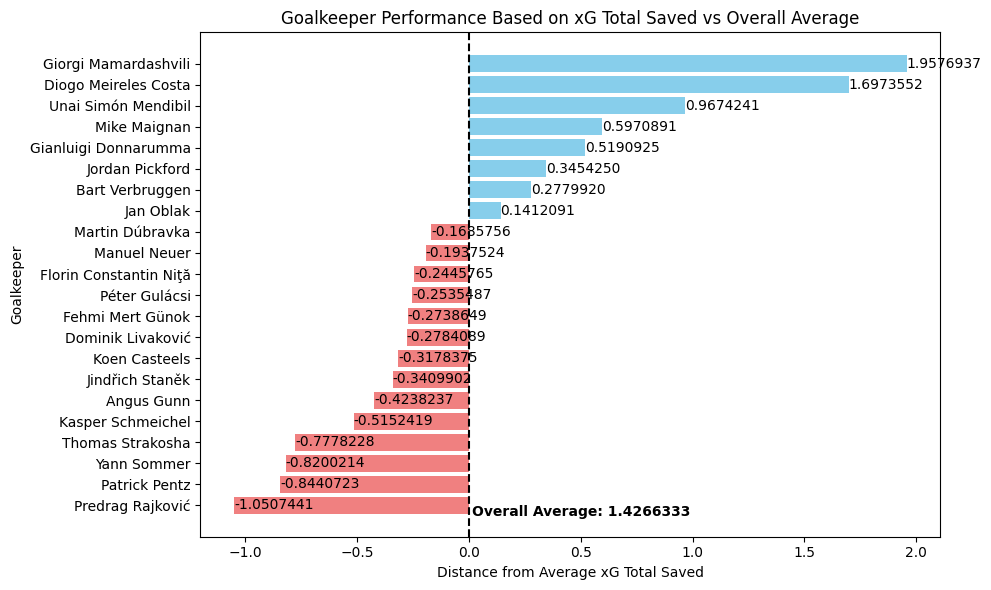

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate xG totals separately for saves and overall
saved_xg = df[df['outcome_name'] == 'Saved'].groupby('gk')['shot_statsbomb_xg'].sum().reset_index()
saved_xg = saved_xg.rename(columns={'shot_statsbomb_xg': 'xg_total_saved'})

# Calculate total goals and saves, and overall xG
summary = df.groupby('gk').agg(
    total_goals=('outcome_name', lambda x: (x == 'Goal').sum()),
    total_saves=('outcome_name', lambda x: (x == 'Saved').sum()),
    xg_total_all=('shot_statsbomb_xg', 'sum'),
    games_played=('match_id', 'nunique')  # Count unique matches
).reset_index()

# Merge the saved xG with the summary DataFrame
summary = summary.merge(saved_xg, on='gk', how='left').fillna(0)

# Calculate overall average xg_total_saved
overall_average_xg_saved = summary['xg_total_saved'].mean()
print(f"Overall Average xG Total Saved: {overall_average_xg_saved:.7f}")

# Calculate performance compared to average
summary['performance'] = summary['xg_total_saved'] - overall_average_xg_saved

# Sort the summary DataFrame by performance (worst to best)
summary = summary.sort_values(by='performance')

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(summary['gk'], summary['performance'], color=['skyblue' if x >= 0 else 'lightcoral' for x in summary['performance']])
plt.axvline(0, color='black', linestyle='--')  # Line for the overall average
plt.title('Goalkeeper Performance Based on xG Total Saved vs Overall Average')
plt.xlabel('Distance from Average xG Total Saved')
plt.ylabel('Goalkeeper')

# Annotate each bar with the distance from average
for bar, performance in zip(bars, summary['performance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{performance:.7f}', 
             va='center', ha='left', fontsize=10, color='black')

# Annotate the average line at the bottom
plt.text(0.5, -0.5, f'Overall Average: {overall_average_xg_saved:.7f}', 
         horizontalalignment='center', color='black', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()

In [321]:
import pandas as pd
from scipy import stats
# Extract Giorgi's xg_total_saved
giorgi_xg = final_output[final_output['gk'] == 'Giorgi Mamardashvili']['xg_total_saved'].values[0]

# Calculate the mean xg_total_saved for other goalkeepers
other_gks_xg_mean = final_output[final_output['gk'] != 'Giorgi Mamardashvili']['xg_total_saved'].mean()

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(final_output[final_output['gk'] != 'Giorgi Mamardashvili']['xg_total_saved'], giorgi_xg)

# Print results
print(f"T-statistic: {t_statistic:.4f}, P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Giorgi does not have the highest average xg_total_saved.")
else:
    print("Fail to reject the null hypothesis: Giorgi has the highest average xg_total_saved.")

T-statistic: -14.3527, P-value: 0.0000
Reject the null hypothesis: Giorgi does not have the highest average xg_total_saved.
